In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf 
from matplotlib.pyplot import *

c:\users\deves\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\deves\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\deves\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\users\deves\appd

In [3]:
x_data = np.linspace(0.0,10.0,1000000)

In [4]:
noise = np.random.randn(len(x_data))

Solving: y=mx+b

In [8]:
y_true = (5 * x_data) + 20 + noise

In [10]:
x_df = pd.DataFrame(data=x_data,columns=["X_data"])
y_df = pd.DataFrame(data=y_true,columns=["Y_values"])

In [12]:
my_data = pd.concat([x_df,y_df],axis=1)
my_data.head()

,X_data,Y_values
0,0.00000,20.475123
1,0.00001,21.375070
2,0.00002,20.266563
3,0.00003,20.863133
4,0.00004,20.455389


<AxesSubplot:xlabel='X_data', ylabel='Y_values'>

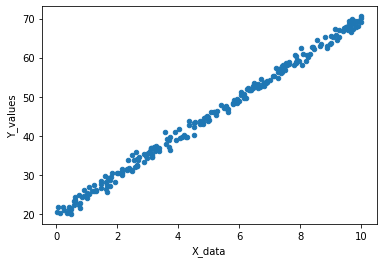

In [17]:
my_data.sample(250).plot(kind="scatter",x="X_data",y="Y_values")

In [18]:
batch_size = 10

In [38]:
m = tf.Variable(-34324242.0)
b = tf.Variable(3.69)

In [39]:
x = tf.placeholder(tf.float32,[batch_size])

In [40]:
yph = tf.placeholder(tf.float32,[batch_size])

In [41]:
y_model = m*x + b

In [42]:
error = tf.reduce_sum(tf.square(yph-y_model))

In [43]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)

In [44]:
train = optimizer.minimize(error)

In [45]:
init = tf.global_variables_initializer()

In [49]:
with tf.Session() as sess:
    sess.run(init)
    
    batches = 100000
    
    for i in range(batches):
        indexes = np.random.randint(len(x_data),size=batch_size)
        feed_dict = {x: x_data[indexes],yph: y_true[indexes]}
        sess.run(train,feed_dict=feed_dict)
        
    final_m,final_b = sess.run([m,b])

In [50]:
final_m

4.9637537

In [51]:
final_b

20.025803

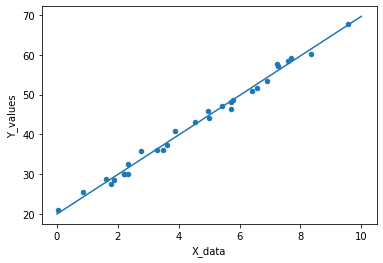

In [55]:
my_data.sample(30).plot(kind='scatter',x="X_data",y="Y_values")
y_hat = x_data * final_m + final_b
plot(x_data,y_hat)